In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from datetime import datetime
import math

In [ ]:
#데이터 불러오기
for i in range(0,30):
  globals()['df_{}'.format(i)] = pd.read_csv(f'/content/drive/MyDrive/data/df_{i}.csv')
  #df_list.append('df_{}'.format(i))

for i in range(30,60):
  globals()['df_{}'.format(i)] = pd.read_csv(f'/content/drive/MyDrive/data/data{i}.csv')
  #df_list.append('df_{}'.format(i))  

#데이터 리스트
df_list = [df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, 
           df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19,
           df_20, df_21, df_22, df_23, df_24, df_25, df_26, df_27, df_28, df_29,
           df_30, df_31, df_32, df_33, df_34, df_35, df_36, df_37, df_38, df_39,
           df_40, df_41, df_42, df_43, df_44, df_45, df_46, df_47, df_48, df_49,
           df_50, df_51, df_52, df_53, df_54, df_55, df_56, df_57, df_58, df_59,]

In [ ]:
# 데이터 concat
df = pd.concat(df_list, ignore_index=True)

# category

In [ ]:
category_idx = df.index[(df['category'] == 'push') | (df['category'] == 'gameLog') | (df['category'] == 'dbschema') | (df['category'] == 'matchmake') | (df['category'] == 'billing') | (df['category'] == 'authorization')]
df = df.drop(category_idx)

# 요일

In [ ]:
# inDate열을 datetime 형태로 변환
df['inDate'] = pd.to_datetime(df['inDate'])

# 요일 columns 생성 (0:월요일,1:화요일,2:수요일,3:목요일,4:금요일,5:토요일,6:일요일)
df['day'] = df['inDate'].apply(lambda x: x.weekday()) 
df

gamer_id  ...  day
0         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...    1
1         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...    1
2         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...    1
3         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...    1
4         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...    1
...                                                     ...  ...  ...
23053420  fffacd2059e511c368b4b927a34d1893c464ea13dd30b1...  ...    5
23053421  fffacd2059e511c368b4b927a34d1893c464ea13dd30b1...  ...    5
23053422  fffacd2059e511c368b4b927a34d1893c464ea13dd30b1...  ...    5
23053423  fffacd2059e511c368b4b927a34d1893c464ea13dd30b1...  ...    5
23053424  fffacd2059e511c368b4b927a34d1893c464ea13dd30b1...  ...    5

[23017974 rows x 7 columns]

# 총 접속수

In [ ]:
#merge를 위한 right table 생성
merge = df[['gamer_id', 'inDate', 'category']] #category를 날짜단위 접속수로 활용

# 첫번째 그룹바이
merge = merge.groupby(by=['gamer_id', 'inDate']).count().reset_index()

# 두번째 그룹바이 : inDate 값 == 유저별 총 접속 날짜수
merge = merge.groupby(by=['gamer_id']).count().reset_index()

# 열이름 변경
merge = merge.rename(columns={"inDate":"login_total"})

# 총접속수 열만 남김
merge = merge[['gamer_id', 'login_total']]

In [ ]:
# merge
df = pd.merge(df, merge, left_on='gamer_id', right_on='gamer_id')
df

gamer_id  ...  login_total
0         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...           15
1         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...           15
2         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...           15
3         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...           15
4         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...           15
...                                                     ...  ...          ...
23017969  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...            1
23017970  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...            1
23017971  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...            1
23017972  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...            1
23017973  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...            1

[23017974 rows x 8 columns]

# 현재접속일과 직전접속일의 차이

In [ ]:
# merge를 위한 데이터테이블 생성
merge_2 = df[['gamer_id', 'inDate']]
merge_2 = merge_2.groupby(by=['gamer_id', 'inDate']).count().reset_index()

In [ ]:
li_1 = []
li_2 = []
for i in range(0, len(merge_2)):
    if i == 0:
        li_1.append(merge_2['inDate'].iloc[i])
        li_2.append(li_1[i] - li_1[i])
      
    elif merge_2['gamer_id'][i] == merge_2['gamer_id'][i-1]:
        li_1.append(merge_2['inDate'].iloc[i])
        li_2.append(li_1[i] - li_1[i-1])
    
    else: # 이전 gamer_id와 다르면
        li_1.append(merge_2['inDate'].iloc[i])
        li_2.append(li_1[i] - li_1[i])


merge_2['diff'] = li_2
merge_2['diff'] = merge_2['diff'].apply(lambda x: int(str(x)[0]))

In [ ]:
# merge : 여기까지 RAM 3.61 GB
df = pd.merge(left=df, right=merge_2, on=['gamer_id', 'inDate'])
df

gamer_id  ...  diff
0         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...     0
1         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...     0
2         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...     0
3         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...     0
4         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...     0
...                                                     ...  ...   ...
23017969  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...     0
23017970  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...     0
23017971  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...     0
23017972  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...     0
23017973  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...     0

[23017974 rows x 9 columns]

# 평균접속주기

In [ ]:
# 여기까지 RAM 
df_group = df[['gamer_id', 'diff', 'login_total']].groupby(by=['gamer_id','diff']).count().reset_index()
df_group = df_group[['gamer_id','diff']]
df_group_0 = df_group[df_group['diff'] != 0] # 첫 접속 제외


# 전체유저 각각의 평균접속주기
df_login_mean = df_group_0.groupby(by=['gamer_id']).mean().reset_index()
df_login_mean = df_login_mean.rename(columns = {'diff':'login_mean'})

# merge ==> outer 병합인 이유는 첫접속만 한 유저들은 평균값이 존재하지 않기 때문에 NaN 값으로 넣기 위해
df = pd.merge(left=df, right=df_login_mean, how='outer', on='gamer_id') 
df

gamer_id  ...  login_mean
0         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...         1.0
1         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...         1.0
2         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...         1.0
3         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...         1.0
4         0001b282486938b2735e00ea3a65a6af52d648c15bfaa8...  ...         1.0
...                                                     ...  ...         ...
23017969  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017970  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017971  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017972  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017973  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN

[23017974 rows x 10 columns]

In [ ]:
# 첫접속만 한 유저 예시
df[df['gamer_id'] == 'ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3bfac354b142d25393d3']

gamer_id  ...  login_mean
23017967  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017968  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017969  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017970  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017971  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017972  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN
23017973  ff7e04acdb9d089c5a6fff1c1b4150156e6183dacc1f3b...  ...         NaN

[7 rows x 10 columns]

In [ ]:
df.to_csv('df_preprocessed.csv', mode='w')

===== 여기까지 사용 =====

===== 아래는 사용X =====

In [ ]:
df_login_group = df[['gamer_id', 'inDate', 'login_total', 'diff']]
df_login_group =  df_login_group.groupby(by=['gamer_id', 'inDate']).mean().reset_index()

# diff 6미만 값'만' 가진 유저들의 총 접속수 분포
diff_over_7_index = df_login_group[(df_login_group['diff'] == 0) | (df_login_group['diff'] == 7) | (df_login_group['diff'] == 8) | (df_login_group['diff'] == 9)].index
df_under_7 = df_login_group.drop(diff_over_7_index)

print("diff 5 이하 값만 가진 유저들의 총 접속수 분포")
print(df_under_7['login_total'].value_counts(normalize=True))


print("===========================================")
print("===========================================")


# diff 6이상 값'만' 가진 유저들의 총 접속수 분포
diff_under_7_index = df_login_group[(df_login_group['diff'] == 0) | (df_login_group['diff'] == 1) | (df_login_group['diff'] == 2) | (df_login_group['diff'] == 3) | (df_login_group['diff'] == 4) | (df_login_group['diff'] == 5) | (df_login_group['diff'] == 6)].index
df_over_7 = df_login_group.drop(diff_under_7_index)

print("diff 6 이상 값만 가진 유저들의 총 접속수 분포")
print(df_over_7['login_total'].value_counts(normalize=True))

diff 5 이하 값만 가진 유저들의 총 접속수 분포
15    0.183519
2     0.094687
3     0.087251
4     0.078087
5     0.067713
14    0.064988
6     0.059853
11    0.054785
7     0.054121
12    0.053703
8     0.051817
13    0.050178
10    0.049827
9     0.049471
Name: login_total, dtype: float64
diff 6 이상 값만 가진 유저들의 총 접속수 분포
2    0.424646
3    0.268803
4    0.156128
5    0.082723
6    0.037843
7    0.018541
8    0.008367
9    0.002948
Name: login_total, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


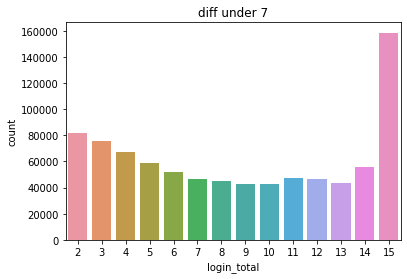

In [ ]:
ax = sns.countplot('login_total', data=df_under_7);
plt.title("diff under 7")
plt.show;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


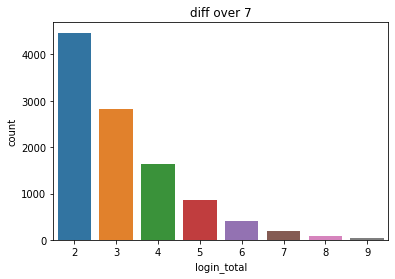

In [ ]:
ax = sns.countplot('login_total', data=df_over_7);
plt.title("diff over 7")
plt.show;

In [ ]:
df_group_day = df[['gamer_id', 'inDate', 'day',]]
df_group_day2 = df[['gamer_id', 'inDate', 'login_total']]

df_group_day = df_group_day.groupby(by=['gamer_id', 'inDate']).mean().reset_index()
df_group_day2 = df_group_day2.groupby(by=['gamer_id', 'inDate']).sum().reset_index()

df_day_login = pd.merge(left=df_group_day, right=df_group_day2, on=['gamer_id','inDate'])

print(f"평일: {len(df_day_login[(df_day_login['day'] == 0) | (df_day_login['day'] == 1) | (df_day_login['day'] == 2) | (df_day_login['day'] == 3) | (df_day_login['day'] == 4)]) / 11}")
print(f"주말: {len(df_day_login[(df_day_login['day'] == 5) | (df_day_login['day'] == 61)]) / 4}")

print(f"월: {len(df_day_login[df_day_login['day'] == 0]) / 2}")
print(f"화: {len(df_day_login[df_day_login['day'] == 1]) / 3}")
print(f"수: {len(df_day_login[df_day_login['day'] == 2]) / 2}")
print(f"목: {len(df_day_login[df_day_login['day'] == 3]) / 2}")
print(f"금: {len(df_day_login[df_day_login['day'] == 4]) / 2}")
print(f"토: {len(df_day_login[df_day_login['day'] == 5]) / 2}")
print(f"일: {len(df_day_login[df_day_login['day'] == 6]) / 2}")

월: 92665.5
화: 83704.0
수: 92545.5
목: 95482.0
금: 96014.5
토: 109084.0
일: 98631.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


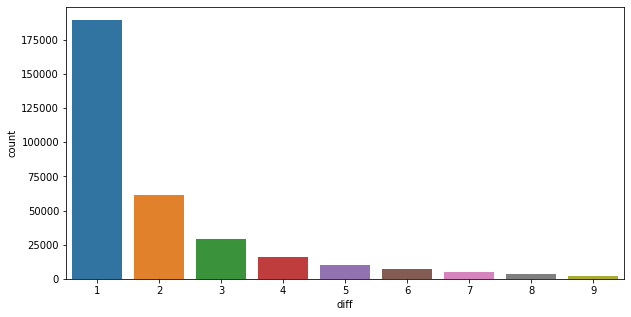

In [ ]:
rcParams['figure.figsize'] = 10, 5
ax = sns.countplot('diff', data=df_group);
#plt.xticks()

In [ ]:
df_group['diff'].value_counts(normalize=True)

1    0.585408
2    0.190643
3    0.088932
4    0.049581
5    0.031205
6    0.021797
7    0.015451
8    0.010014
9    0.006969
Name: diff, dtype: float64